In [107]:
import pandas as pd
import numpy as np
import collections as clt
import networkx as nx
import matplotlib.pyplot as plt

In [108]:
plt.rcParams["figure.figsize"] = (10,7) #defining size of plots

In [109]:
df = pd.read_csv('reviews_full_v9-2.csv')
df.head()

,User,Date,Year,Month,Release,Band,Score,Link,Album_link,Review_title,...,Band_Genre,Combined_Genre,Key Features,Cleansed Features,Cleansed Text,Product Features,Product Features_dep,neg,neu,pos
0,SpookyApparition,July 11 2002,2002,7,Chaosphere,Meshuggah,82,https://www.metal-archives.com/reviews/Meshugg...,https://www.metal-archives.com/albums/Meshugga...,Technical metal at it's finest.,...,groove metal|thrash metal,technical thrash metal|math metal|progressive ...,originally bought|entire album|sounded variati...,originally bought|entire album|sounded variati...,I originally bought Chaosphere in late 2000......,entire album|sounded variation|grown appreciat...,tacky place|respective instruments|vocal perfo...,0.025,0.826,0.149
1,SpookyApparition,July 14 2002,2002,7,Necroticism_-_Descanting_the_Insalubrious,Carcass,88,https://www.metal-archives.com/reviews/Carcass...,https://www.metal-archives.com/albums/Carcass/...,Carcass at their finest.,...,grindcore|death metal,grindcore|melodic death metal,somewhat song structures|song structures|injec...,somewhat song structures|song structures|injec...,A midpoint between Carcass' early grind albums...,somewhat song structures|song structures|injec...,melodic variety|vocal performances|enjoyable a...,0.038,0.850,0.111
2,MarkRyan,July 15 2002,2002,7,Angels_Fall_First,Nightwish,90,https://www.metal-archives.com/reviews/Nightwi...,https://www.metal-archives.com/albums/Nightwis...,On par with their other stuff...,...,symphonic metal|power metal,symphonic power metal,general consensus|lose credibility|sung poet|b...,general consensus|lose credibility|sung poet|b...,"I'm not hard-core into metal at all, really, b...",general consensus|lose credibility|sung poet|b...,beautiful melody|beautiful example|general con...,0.026,0.771,0.202
3,Fear,July 16 2002,2002,7,Dark_Genesis,Iced_Earth,87,https://www.metal-archives.com/reviews/Iced_Ea...,https://www.metal-archives.com/albums/Iced_Ear...,Brilliance in Repackaging,...,thrash metal|power metal,heavy metal|us power metal,new album fact|old material|bought big fan|big...,new album fact|old material|bought big fan|big...,"This is not a new album, but in fact, five alb...",new album fact|old material|bought big fan|big...,different versions|original vocals|old materia...,0.031,0.723,0.246
4,Esoteric,July 16 2002,2002,7,A_Night_at_the_Opera,Blind_Guardian,70,https://www.metal-archives.com/reviews/Blind_G...,https://www.metal-archives.com/albums/Blind_Gu...,Somewhat Disappointing,...,speed metal|power metal,power metal,accurate description album|vocal lines|meaty a...,accurate description album|vocal lines|meaty a...,I've been trying for months to come up with an...,accurate description album|vocal lines|meaty a...,catchy songs|bad album|vocal lines|little line...,0.130,0.747,0.123


In [160]:
users = {}

for i,row in df.iterrows():
    if row.User not in users:
        users[row.User] = []
    users[row.User].append((row.Score, row.Sentiment))

users = {k: v for k, v in sorted(users.items(), key=lambda item: len(item[1]), reverse = True)}

In [161]:
for user in users:
    users[user] = sorted(users[user])

In [162]:
def normalize(arr):
    maxi = max(arr)
    mini = min(arr)
    return [(x-mini)/(maxi-mini) for x in arr]

def rolling_ave(arr, sz = 500):
    sz = len(arr) // 5
    ret = []
    for i in range(len(arr)):
        ret.append(np.mean(arr[max(0,i-sz):min(i+sz, len(arr))]))
    return ret

In [163]:
list(users)[:10]

['autothrall',
 'hells_unicorn',
 'Noktorn',
 'NausikaDalazBlindaz',
 'kluseba',
 'Perplexed_Sjel',
 'dismember_marcin',
 'TheStormIRide',
 'Diamhea',
 'Felix_1666']

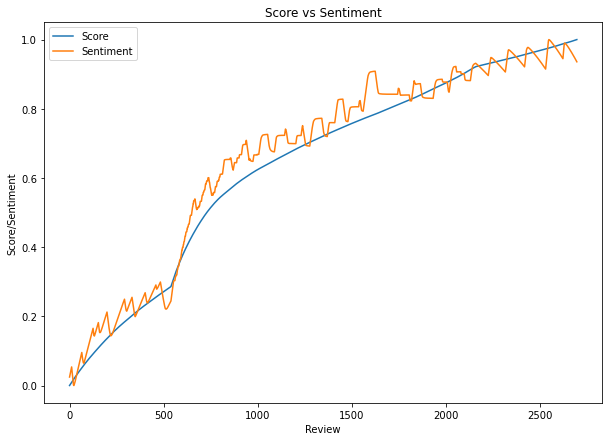

In [169]:
#autothrall
plt.title('Score vs Sentiment')
plt.ylabel('Score/Sentiment')
plt.xlabel('Review')
plt.plot(normalize(rolling_ave(np.array([x[0] for x in users['hells_unicorn']]))), label = 'Score')
plt.plot(normalize(rolling_ave([x[1] for x in users['hells_unicorn']])), label = 'Sentiment')
plt.legend()
plt.show()

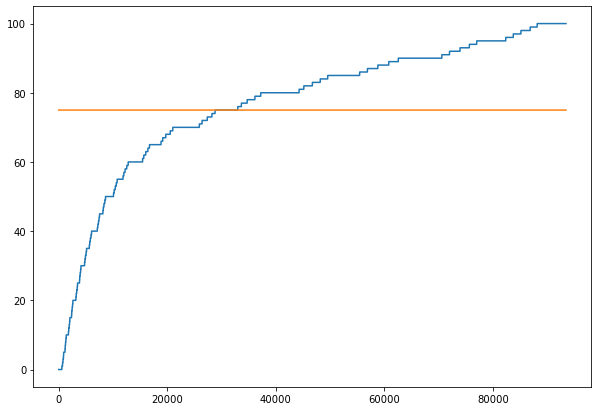

In [91]:
plt.plot(sorted(df.Score))
plt.plot([75 for x in df.Score])
plt.show()